# NMDS for R
- https://yokazaki.hatenablog.com/entry/2016/06/29/212153
- https://www.rdocumentation.org/packages/vegan/versions/2.4-2/topics/vegdist
- https://www.rdocumentation.org/packages/vegan/versions/2.4-2/topics/metaMDS
-https://www.youtube.com/watch?v=tVnnG7mFeqA


# Install vegan package

In [2]:
install.packages("vegan", dependencies = TRUE)

also installing the dependencies ‘permute’, ‘cluster’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [4]:
library(vegan)

Loading required package: permute

Loading required package: lattice

This is vegan 2.5-7



## Read data file

In [85]:
species_data = read.csv("species_data.csv")

In [86]:
t(species_data)

Site1,120,600,50,225,1200,600
Site2,60,720,80,230,2300,363
Site3,120,230,20,320,500,150
Site4,30,400,150,20,230,200
Site5,50,500,200,10,10,200


## Create Bray curtis distance

In [87]:
bray_dist = vegdist(t(species_data), method = "bray")
bray_dist

          Site1     Site2     Site3     Site4
Site2 0.2370189                              
Site3 0.3978235 0.5326919                    
Site4 0.5137255 0.5985783 0.4261603          
Site5 0.5644090 0.6400593 0.5930736 0.2000000

## Rarefaction
- covrared

In [88]:
OTU_table = t(species_data)
#各サンプル、１リード増えるごとの傾きをリスト形式で一括出力（要計算時間）
rareslopelist<-list()
for(i in 1:nrow(OTU_table)){
  rareslopelist[[i]]<-rareslope(OTU_table[i,],1:(sum(OTU_table[i,])-1))
}#最後の1リードを入れずに「-1」としているのは、最後の1リードについては傾きが計算できない（0になる）ため

#最後のリードの傾きが最も大きい（＝カバー率が最も低い）サンプルを探す
getmincov<-c()
  for(i in 1:nrow(OTU_table)){
    getmincov[i]<-rareslopelist[[i]][length(rareslopelist[[i]])]
}#最後の1リードの傾きだけをベクトルでとってくる

(1-max(getmincov))*100　#カバレッジの％を確認

#指定したカバレッジに到達した（＝傾きが指定値を下回る）瞬間のリード数をサンプルごとに採ってくる
cvrfun<-function(x){min(which(x<=max(getmincov)))+1} #関数を設定。上記で1を引いた分を足し戻す
cvrrare<-unlist(lapply(rareslopelist,cvrfun))　#lapply+unlistでベクトル形式にして一括で値を取得

set.seed(123) #再現性をとるためにランダム変数を固定（数字は何でもいい）
OTU_covrared<-rrarefy(OTU_table,cvrrare) 
write.csv(OTU_covrared,"covarage_rared_species.csv") 

[1] 100

## Apply NMDS
- metaMDS (vegan package)
    - x : data
    - k : dimention
    - trymax : iterate 20 times
    - trace : FALSE => Don't show the log

In [89]:
set.seed(123) #NMDSの再現性を担保するため、ランダム変数を固定（数字はなんでもいい）
nmds<-metaMDS(OTU_covrared,k=2,trymax=5, trace =FALSE) 

Warning message in metaMDS(OTU_covrared, k = 2, trymax = 5, trace = FALSE):
“stress is (nearly) zero: you may have insufficient data”


In [90]:
nmds$stress

[1] 0

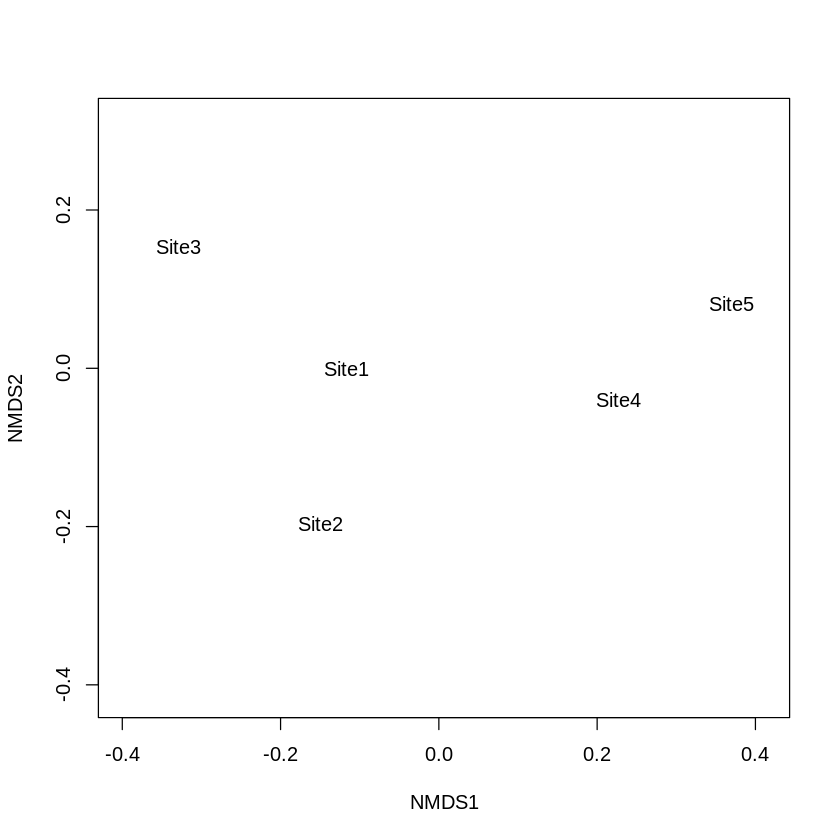

In [91]:
ordiplot(nmds,type="n") #枠を書く
orditorp(nmds,display="sites",air=0.1,cex=1)　#点を書く

---
# Random data

In [1]:
random_data = read.csv("random_data.csv", header = T, row.names=1)

In [2]:
t(random_data)

,Specie_0,Specie_1,Specie_2,Specie_3,Specie_4,Specie_5,Specie_6,Specie_7,Specie_8,Specie_9,⋯,Specie_35,Specie_36,Specie_37,Specie_38,Specie_39,Specie_40,Specie_41,Specie_42,Specie_43,Specie_44
Site0,43,109,263,365,127,366,281,72,33,422,⋯,661,657,328,687,107,627,25,527,302,32
Site1,306,9,126,433,202,666,177,231,98,41,⋯,30,247,163,626,685,67,53,76,165,43
Site2,240,103,275,13,223,595,211,126,294,6,⋯,709,149,134,468,606,381,38,240,328,46
Site3,548,141,380,145,64,659,214,302,38,477,⋯,323,488,465,181,208,21,27,518,262,58
Site4,531,168,354,396,105,244,494,472,7,365,⋯,471,160,292,244,229,465,7,71,51,41
Site5,257,17,200,229,206,178,339,343,255,543,⋯,600,463,481,74,276,251,51,419,216,5
Site6,331,166,37,3,216,428,374,105,60,146,⋯,130,687,346,787,203,297,32,588,250,1
Site7,207,85,500,210,157,113,73,216,132,838,⋯,212,797,424,565,80,491,31,574,153,57
Site8,556,83,457,165,180,145,156,161,72,10,⋯,434,264,216,565,524,589,7,593,35,58
Site9,601,184,367,303,216,208,15,400,30,716,⋯,630,695,518,721,511,257,56,222,147,32


In [5]:
bray_dist = vegdist(t(random_data), method = "bray")
bray_dist

           Site0     Site1     Site2     Site3     Site4     Site5     Site6
Site1  0.4086027                                                            
Site2  0.3731480 0.2930548                                                  
Site3  0.3813949 0.3832315 0.3670198                                        
Site4  0.3981809 0.3841758 0.3722925 0.2685638                              
Site5  0.3227490 0.3733470 0.3362504 0.3121940 0.3191526                    
Site6  0.2851173 0.3416227 0.3579146 0.3351219 0.3781013 0.3217072          
Site7  0.2700574 0.3488019 0.3653352 0.3196552 0.3278865 0.2436053 0.2613055
Site8  0.4166550 0.3712949 0.3365371 0.3353364 0.2770900 0.3612880 0.3389560
Site9  0.3485420 0.3409896 0.3547316 0.2746023 0.2724933 0.2270476 0.3011837
Site10 0.4206561 0.4435955 0.3040199 0.3260306 0.3242198 0.3437515 0.4151043
Site11 0.3816335 0.3114998 0.3103448 0.3232219 0.2355908 0.2746822 0.3488310
Site12 0.3529544 0.3842249 0.3542690 0.3089788 0.3330141 0.3066374 0.3339667

In [6]:
OTU_table = t(random_data)
#各サンプル、１リード増えるごとの傾きをリスト形式で一括出力（要計算時間）
rareslopelist<-list()
for(i in 1:nrow(OTU_table)){
  rareslopelist[[i]]<-rareslope(OTU_table[i,],1:(sum(OTU_table[i,])-1))
}#最後の1リードを入れずに「-1」としているのは、最後の1リードについては傾きが計算できない（0になる）ため

#最後のリードの傾きが最も大きい（＝カバー率が最も低い）サンプルを探す
getmincov<-c()
  for(i in 1:nrow(OTU_table)){
    getmincov[i]<-rareslopelist[[i]][length(rareslopelist[[i]])]
}#最後の1リードの傾きだけをベクトルでとってくる

(1-max(getmincov))*100　#カバレッジの％を確認

#指定したカバレッジに到達した（＝傾きが指定値を下回る）瞬間のリード数をサンプルごとに採ってくる
cvrfun<-function(x){min(which(x<=max(getmincov)))+1} #関数を設定。上記で1を引いた分を足し戻す
cvrrare<-unlist(lapply(rareslopelist,cvrfun))　#lapply+unlistでベクトル形式にして一括で値を取得

set.seed(123) #再現性をとるためにランダム変数を固定（数字は何でもいい）
OTU_covrared<-rrarefy(OTU_table,cvrrare) 
write.csv(OTU_covrared,"covarage_rared_random.csv") 

[1] 99.99077

In [7]:
set.seed(123) #NMDSの再現性を担保するため、ランダム変数を固定（数字はなんでもいい）
nmds<-metaMDS(OTU_covrared,k=2,trymax=5, trace =FALSE) 

In [8]:
nmds$stress

[1] 0.1794543

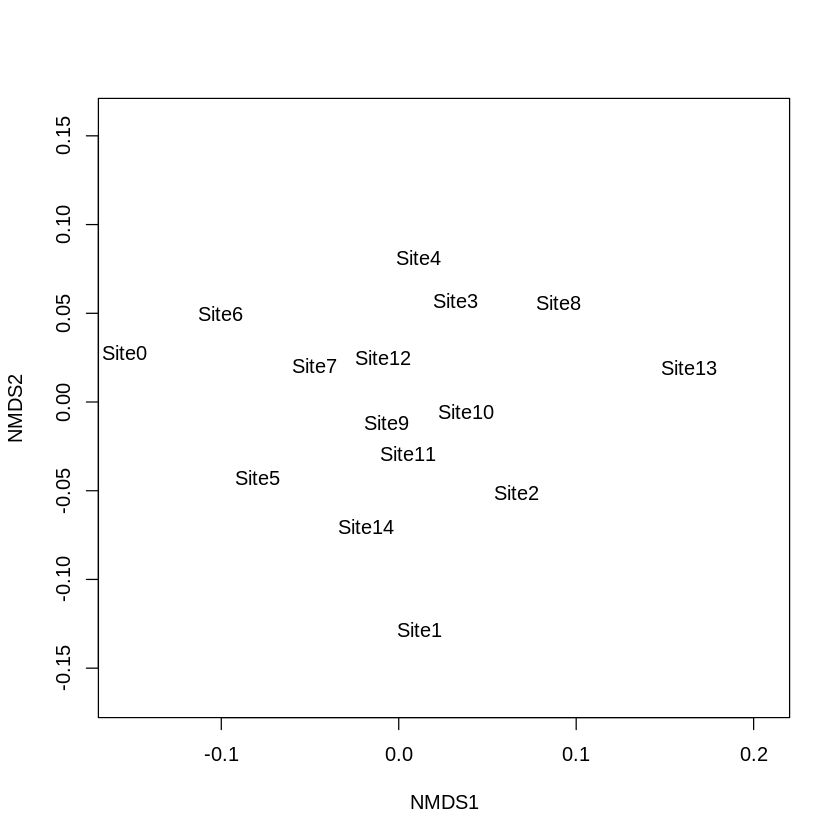

In [9]:
ordiplot(nmds,type="n") #枠を書く
orditorp(nmds,display="sites",air=0.1,cex=1)　#点を書く